# Numerical examples for $p+2$ paper

## Rosen-Zener model

In [1]:
using TimeDependentLinearODESystems

In [2]:
load_example("rosen_zener.jl")

full (generic function with 13 methods)

### Data from eq. (6.3)

In [3]:
V0= 1.0
omega=0.5
T0=1.0
d=100
RZ=RosenZener(V0, omega, T0, d);

### Local error CF2 (Table 4)

In [4]:
g=ones(size(RZ,2))
psi = g.+0.0im 
local_orders_est(RZ,  psi, 0, 0.5; 
scheme=CF2, reference_scheme=CF6,
symmetrized_defect=true,
trapezoidal_rule=true,
reference_steps=10, rows=8, use_expm=true);

             dt         err      p       err_est      p
--------------------------------------------------------
  1   5.000e-01   1.960e-01            6.470e-03
  2   2.500e-01   2.628e-02   2.90     2.232e-04   4.86
  3   1.250e-01   3.343e-03   2.97     7.157e-06   4.96
  4   6.250e-02   4.198e-04   2.99     2.251e-07   4.99
  5   3.125e-02   5.254e-05   3.00     7.047e-09   5.00
  6   1.563e-02   6.569e-06   3.00     2.203e-10   5.00
  7   7.813e-03   8.212e-07   3.00     6.885e-12   5.00
  8   3.906e-03   1.026e-07   3.00     2.157e-13   5.00


### Local error CF4, Taylor variant (Table 5)

In [5]:
g=ones(size(RZ,2))
psi = g.+0.0im 
local_orders_est(RZ,  psi, 0, 1.0; 
scheme=CF4, reference_scheme=CF6,
symmetrized_defect=true,
trapezoidal_rule=false,
reference_steps=10, rows=6, use_expm=true);

             dt         err      p       err_est      p
--------------------------------------------------------
  1   1.000e+00   5.194e-02            5.702e-03
  2   5.000e-01   1.884e-03   4.78     5.854e-05   6.61
  3   2.500e-01   6.029e-05   4.97     4.875e-07   6.91
  4   1.250e-01   1.892e-06   4.99     3.868e-09   6.98
  5   6.250e-02   5.918e-08   5.00     3.033e-11   6.99
  6   3.125e-02   1.850e-09   5.00     2.373e-13   7.00


### Local error CF4, Hermite variant (Table 6)

In [6]:
g=ones(size(RZ,2))
psi = g.+0.0im 
local_orders_est(RZ,  psi, 0, 1.0; 
scheme=CF4, reference_scheme=CF6,
symmetrized_defect=true,
trapezoidal_rule=true,
reference_steps=10, rows=6, use_expm=true);

             dt         err      p       err_est      p
--------------------------------------------------------
  1   1.000e+00   5.194e-02            3.992e-03
  2   5.000e-01   1.884e-03   4.78     4.008e-05   6.64
  3   2.500e-01   6.029e-05   4.97     3.277e-07   6.93
  4   1.250e-01   1.892e-06   4.99     2.584e-09   6.99
  5   6.250e-02   5.918e-08   5.00     2.023e-11   7.00
  6   3.125e-02   1.850e-09   5.00     1.583e-13   7.00


### Local error Magnus4, Hermite variant (Table 7)

In [7]:
g=ones(size(RZ,2))
psi = g.+0.0im 
@time local_orders_est(RZ,  psi, 0, 1.0; 
scheme=Magnus4, reference_scheme=CF6,
symmetrized_defect=true,
trapezoidal_rule=true,
reference_steps=10,rows=6, use_expm=true);

             dt         err      p       err_est      p
--------------------------------------------------------
  1   1.000e+00   1.129e-01            8.522e-03
  2   5.000e-01   4.788e-03   4.56     1.214e-04   6.13
  3   2.500e-01   1.618e-04   4.89     1.126e-06   6.75
  4   1.250e-01   5.154e-06   4.97     9.201e-09   6.94
  5   6.250e-02   1.618e-07   4.99     7.269e-11   6.98
  6   3.125e-02   5.064e-09   5.00     5.693e-13   7.00
  2.282050 seconds (2.05 M allocations: 1.100 GiB, 5.67% gc time)


### Reference solution for global error tables

In [8]:
g=ones(size(RZ,2))
psi_ref = g.+0.0im 
t0 = 0.0
tend = 1.0
dt = 0.01
for t in EquidistantTimeStepper(RZ, psi_ref, 0.0, 1.0, dt, scheme=CF8, use_expm=true)
end

┌ Warning: The start/next/done iteration protocol is deprecated. Implement `iterate(::EquidistantTimeStepper)`.
│   caller = ip:0x0
└ @ Core :-1


### Global error CF2, basis scheme

In [9]:
g=ones(size(RZ,2))
psi = g.+0.0im 
global_orders(RZ,  psi, psi_ref, t0, tend, 0.5; 
scheme=CF2,
rows=6, use_expm=true);

             dt         err           C      p 
-----------------------------------------------
  1   5.000e-01   2.713e-01
  2   2.500e-01   6.618e-02   1.112e+00   2.04
  3   1.250e-01   1.645e-02   1.071e+00   2.01
  4   6.250e-02   4.106e-03   1.057e+00   2.00
  5   3.125e-02   1.026e-03   1.053e+00   2.00
  6   1.563e-02   2.565e-04   1.051e+00   2.00


### Global error CF2, corrected scheme

In [10]:
g=ones(size(RZ,2))
psi = g.+0.0im 
global_orders(RZ,  psi, psi_ref, t0, tend, 0.5; 
scheme=CF2,
symmetrized_defect=true,
trapezoidal_rule=true,
corrected_scheme=true,
rows=6, use_expm=true);

             dt         err           C      p 
-----------------------------------------------
  1   5.000e-01   7.652e-03
  2   2.500e-01   4.638e-04   1.263e-01   4.04
  3   1.250e-01   2.880e-05   1.203e-01   4.01
  4   6.250e-02   1.797e-06   1.185e-01   4.00
  5   3.125e-02   1.123e-07   1.180e-01   4.00
  6   1.563e-02   7.018e-09   1.178e-01   4.00


### Global error CF4, basis scheme

In [11]:
g=ones(size(RZ,2))
psi = g.+0.0im 
global_orders(RZ,  psi, psi_ref, t0, tend, 0.5; 
scheme=CF4,
rows=6, use_expm=true);

             dt         err           C      p 
-----------------------------------------------
  1   5.000e-01   2.098e-03
  2   2.500e-01   1.212e-04   3.631e-02   4.11
  3   1.250e-01   7.443e-06   3.215e-02   4.03
  4   6.250e-02   4.632e-07   3.089e-02   4.01
  5   3.125e-02   2.892e-08   3.049e-02   4.00
  6   1.563e-02   1.807e-09   3.036e-02   4.00


### Global error CF4, corrected scheme, Hermite variant

In [12]:
g=ones(size(RZ,2))
psi = g.+0.0im 
global_orders(RZ,  psi, psi_ref, t0, tend, 0.5; 
scheme=CF4,
symmetrized_defect=true,
trapezoidal_rule=true,
corrected_scheme=true,
rows=6, use_expm=true);

             dt         err           C      p 
-----------------------------------------------
  1   5.000e-01   3.203e-05
  2   2.500e-01   4.402e-07   2.331e-03   6.19
  3   1.250e-01   6.702e-09   1.899e-03   6.04
  4   6.250e-02   1.041e-10   1.789e-03   6.01
  5   3.125e-02   1.676e-12   1.549e-03   5.96
  6   1.563e-02   1.052e-13   1.719e-06   3.99


### Global error Magnus4, basis scheme

In [13]:
g=ones(size(RZ,2))
psi = g.+0.0im 
global_orders(RZ,  psi, psi_ref, t0, tend, 0.5; 
scheme=Magnus4,
rows=6, use_expm=true);

             dt         err           C      p 
-----------------------------------------------
  1   5.000e-01   6.957e-03
  2   2.500e-01   4.362e-04   1.110e-01   4.00
  3   1.250e-01   2.728e-05   1.115e-01   4.00
  4   6.250e-02   1.705e-06   1.117e-01   4.00
  5   3.125e-02   1.066e-07   1.117e-01   4.00
  6   1.563e-02   6.662e-09   1.118e-01   4.00


### Global error Magnus4, corrected scheme, Hermite variant

In [14]:
g=ones(size(RZ,2))
psi = g.+0.0im 
global_orders(RZ,  psi, psi_ref, t0, tend, 0.5; 
scheme=Magnus4,
symmetrized_defect=true,
trapezoidal_rule=true,
corrected_scheme=true,
rows=6, use_expm=true);

             dt         err           C      p 
-----------------------------------------------
  1   5.000e-01   1.536e-04
  2   2.500e-01   2.452e-06   9.624e-03   5.97
  3   1.250e-01   3.853e-08   9.930e-03   5.99
  4   6.250e-02   6.029e-10   1.006e-02   6.00
  5   3.125e-02   9.419e-12   1.012e-02   6.00
  6   1.563e-02   1.688e-13   5.091e-03   5.80


### Plot of adaptive step-sizes

In [15]:
g=ones(size(RZ,2))
psi = g.+0.0im 
t0 = -5.0
tend= 5.0
t_CF4=[t0]
for t in AdaptiveTimeStepper(RZ, psi, t0, tend, 1, 1e-8, scheme=CF4, use_expm=true)
    push!(t_CF4,t)
end

t= -5.000000000e+00  err=   1.11093329e+04  dt=   2.50000000e-01  rejected...
t= -5.000000000e+00  err=   7.67747976e+00  dt=   1.49671387e-01  rejected...


In [16]:
g=ones(size(RZ,2))
psi = g.+0.0im 
t0 = -5.0
tend= 5.0
t_Magnus4=[t0]
for t in AdaptiveTimeStepper(RZ, psi, t0, tend, 1, 1e-8, scheme=Magnus4, use_expm=true)
    push!(t_Magnus4,t)
end

t= -5.000000000e+00  err=   1.15558495e+04  dt=   2.50000000e-01  rejected...
t= -5.000000000e+00  err=   7.78353083e+00  dt=   1.49261289e-01  rejected...


In [17]:
using PyPlot

In [18]:
f1(t)=V0*cos(omega*t)/cosh(t/T0)
f2(t)=V0*sin(omega*t)/cosh(t/T0)

f2 (generic function with 1 method)

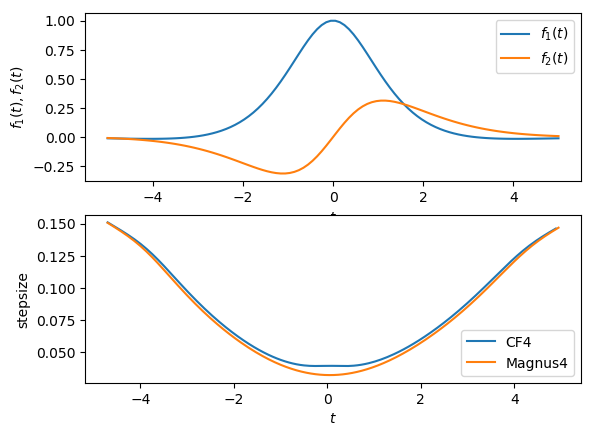

┌ Warning: `linspace(start, stop, length::Integer)` is deprecated, use `range(start, stop=stop, length=length)` instead.
│   caller = top-level scope at In[19]:2
└ @ Core In[19]:2


In [19]:
subplot(2, 1, 1)
tt=linspace(-5,5,100)  
xlabel("\$t\$")
ylabel("\$f_1(t), f_2(t)\$")
plot(tt,f1.(tt), label="\$f_1(t)\$")
plot(tt,f2.(tt), label="\$f_2(t)\$")
legend()
subplot(2, 1, 2)
xlabel("\$t\$")
ylabel("stepsize")
plot(t_CF4[3:end-1], t_CF4[3:end-1]-t_CF4[2:end-2],label="CF4")
plot(t_Magnus4[3:end-1],t_Magnus4[3:end-1]-t_Magnus4[2:end-2],label="Magnus4")
legend(loc=4)
savefig("stepsizes_rosen_zener.png", bbox_inches="tight")
